<a href="https://colab.research.google.com/github/MMDesmni/project3/blob/main/DA_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Load Libraries

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

In [ ]:
! pip install kaggle --quiet

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!nvidia-smi

Thu Aug 14 15:14:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!wget -qO- https://raw.githubusercontent.com/rapidsai/rapidsai-csp-utils/main/colab/install_rapids.py | python -


In [ ]:
import cudf
import cuml

print("cudf version:", cudf.__version__)
print("cuml version:", cuml.__version__)


In [ ]:
import cudf
import cuml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Kaggle Authentication

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Data Extraction

In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
 99% 647M/653M [00:08<00:00, 124MB/s]
100% 653M/653M [00:08<00:00, 82.8MB/s]


In [ ]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_March23.csv  


In [ ]:
import cudf

df = cudf.read_csv("/content/US_Accidents_March23.csv")

df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype
---  ------                 -----
 0   ID                     object
 1   Source                 object
 2   Severity               int64
 3   Start_Time             object
 4   End_Time               object
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object
 11  Street                 object
 12  City                   object
 13  County                 object
 14  State                  object
 15  Zipcode                object
 16  Country                object
 17  Timezone               object
 18  Airport_Code           object
 19  Weather_Timestamp      object
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)            float64
 23  

In [ ]:
import dask.dataframe as dd

df = dd.read_csv("/content/US_Accidents_March23.csv")

# df.info()
df.isna().sum().compute()


In [ ]:
np.unique(df["Source"])

2    Source1
0    Source2
1    Source3
Name: Source, dtype: object

In [ ]:
np.unique(df["Astronomical_Twilight"])

1      Day
0    Night
2     <NA>
Name: Astronomical_Twilight, dtype: object

# Sampling

In [ ]:
# random sampling
import numpy as np
random_indexes = np.random.randint(0, len(df), size=5000)
df.iloc[random_indexes ].to_csv("accicent_sample.csv", index=False)

In [ ]:
import cuml  # scikit-learn

# Data Cleaning

#We get the dataset info to check how much we got from the volume of the data base and which columns we still have with which type

In [ ]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 25 columns):
 #   Column             Dtype
---  ------             -----
 0   Severity           uint8
 1   Start_Lat          float32
 2   Start_Lng          float32
 3   End_Lat            float32
 4   End_Lng            float32
 5   Timezone           object
 6   Temperature(F)     float32
 7   Humidity(%)        uint8
 8   Visibility(mi)     float32
 9   Wind_Direction     object
 10  Wind_Speed(mph)    float64
 11  Precipitation(in)  float32
 12  Amenity            uint8
 13  Bump               uint8
 14  Crossing           uint8
 15  Give_Way           uint8
 16  Junction           uint8
 17  No_Exit            uint8
 18  Railway            uint8
 19  Roundabout         uint8
 20  Station            uint8
 21  Stop               uint8
 22  Traffic_Calming    uint8
 23  Traffic_Signal     uint8
 24  Timezone_mapped    uint8
dtypes: float32(7), float64(1), object(2), uint8(15)
memo

##We use the min() and max() to find the range of our numbers to export them into smaller types to have less volume taken of our memory

In [ ]:
#print(df["Precipitation(in)"].max())
#print(df["Precipitation(in)"].min())
df['Precipitation(in)'] = df['Precipitation(in)'].astype('float32')

In [ ]:
#print(df["Wind_Speed(mph)"].max())
#print(df["Wind_Speed(mph)"].min())

In [ ]:
#print(df["Visibility(mi)"].min())
#print(df["Visibility(mi)"].max())
df['Visibility(mi)'] = df['Visibility(mi)'].astype('float32')

In [ ]:
#print(df["Humidity(%)"].min())
#print(df["Humidity(%)"].max())
df['Humidity(%)'] = df['Humidity(%)'].astype('uint8')

In [ ]:
#print(df["Temperature(F)"].min())
#print(df["Temperature(F)"].max())
df['Temperature(F)'] = df['Temperature(F)'].astype('float32')

In [ ]:
#print(df["End_Lng"].max())
#print(df["End_Lng"].min())
df['End_Lng'] = df['End_Lng'].astype('float32')

In [ ]:
#print(df["End_Lat"].max())
#print(df["End_Lat"].min())
df['End_Lat'] = df['End_Lat'].astype('float32')

In [ ]:
#print(df["Start_Lng"].max())
#print(df["Start_Lng"].min())
df['Start_Lng'] = df['Start_Lng'].astype('float32')

In [ ]:
#print(df["Start_Lat"].max())
#print(df["Start_Lat"].min())
df['Start_Lat'] = df['Start_Lat'].astype('float32')

###For this part we use the map method to map them into numbers so we just work with numbers

In [ ]:
df['Timezone_mapped'] = df['Timezone'].map({
    'US/Eastern': 0,
    'US/Central': 1,
    'US/Mountain': 2,
    'US/Pacific': 3
}).fillna(4).astype('uint8')

In [ ]:
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].map({'day': 0, 'night': 1}).fillna(2).astype('uint8')

###This part is the colunms that we know that they are bollean and we could easily turn them into 0 and 1


In [ ]:
df["Traffic_Calming"] = df["Traffic_Calming"].astype("uint8")

In [ ]:
df["Stop"] = df["Stop"].astype("uint8")

In [ ]:
df["Station"] = df["Station"].astype("uint8")

In [ ]:
df["Roundabout"] = df["Roundabout"].astype("uint8")

In [ ]:
df["No_Exit"] = df["No_Exit"].astype("uint8")

In [ ]:
df["Junction"] = df["Junction"].astype("uint8")

In [ ]:
df["Give_Way"] = df["Give_Way"].astype("uint8")

In [ ]:
df["Amenity"] = df["Amenity"].astype("uint8")

In [ ]:
df["Severity"] = df["Severity"].astype("uint8")

In [ ]:
df["Railway"] = df["Railway"].astype("uint8")

In [ ]:
df["Traffic_Signal"] = df["Traffic_Signal"].astype('uint8')

In [ ]:
df["Crossing"] = df["Crossing"].astype('uint8')

In [ ]:
df['Bump'] = df['Bump'].astype('uint8')

###This part is the deleted columns and useless information that we do not need


In [ ]:
df.drop(columns=["Weather_Condition"],inplace=True)

In [ ]:
df.drop(columns=["Weather_Timestamp"],inplace=True)

In [ ]:
df.drop(columns=["Street"],inplace=True)

In [ ]:
df.drop(columns=["Astronomical_Twilight"],inplace=True)

In [ ]:
df.drop(columns=["Nautical_Twilight"],inplace=True)

In [ ]:
df.drop(columns=["Civil_Twilight"],inplace=True)

In [ ]:
df.drop(columns=["Turning_Loop"],inplace=True)

In [ ]:
df.drop(columns=["Distance(mi)"],inplace=True)

In [ ]:
df.drop(columns=["End_Time"],inplace=True)

In [ ]:
df.drop(columns=["Start_Time"],inplace=True)

In [ ]:
df.drop(columns=["City"],inplace=True)

In [ ]:
df.drop(columns=["County"],inplace=True)

In [ ]:
df.drop(columns=["Wind_Chill(F)"],inplace=True)

In [ ]:
df.drop(columns=["State"], inplace=True)

In [ ]:
df.drop(columns=["Airport_Code"], inplace=True)

In [ ]:
df.drop(columns=["Description"], inplace=True)

In [ ]:
df.drop(columns=["Pressure(in)"], inplace=True)

In [ ]:
df.drop(columns=["Zipcode"], inplace=True)

In [ ]:
df.drop(columns=["Country"], inplace=True)

In [ ]:
df.drop(columns=["ID"], inplace=True)

In [ ]:
#for col in ["Severity", "Bump", "Crossing", "Give_Way"]:
  #df[col] = df[col].astype(np.uint8)

# Plotting


#This is one simple plot for instance so we know how we should plot using cumpy and seaborn and not using numpy


/tmp/ipython-input-3585985285.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="viridis")


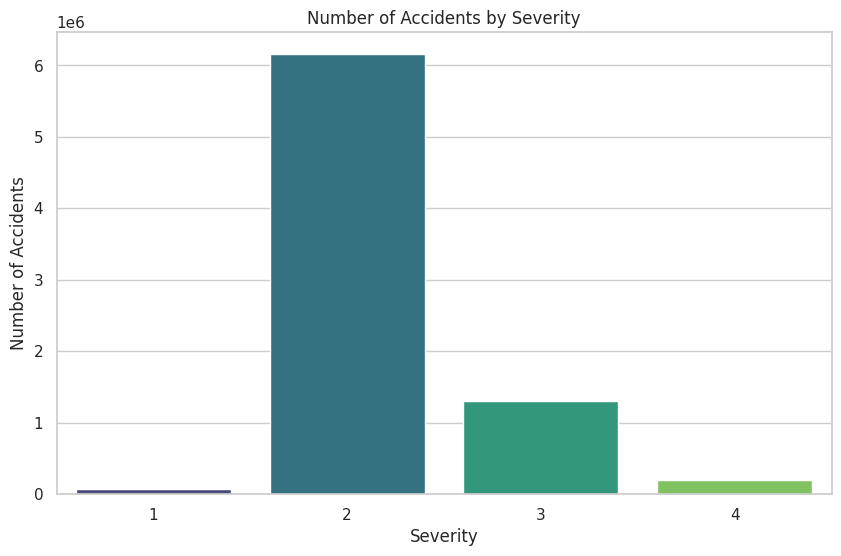

In [ ]:
#Import libraries we need

import cudf
import cupy as cp
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting and creating dataframe

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
gdf = cudf.read_csv('/content/US_Accidents_March23.csv')

#Counting the numbers for our plotting

severity_counts = gdf['Severity'].value_counts().sort_index()

#Initiationg the variables

x = severity_counts.index.values.get()
y = severity_counts.values.get()


#Final plotting

plt.figure()
sns.barplot(x=x, y=y, palette="viridis")
plt.title('Number of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


# Finding Outliers


In [ ]:
#Importing Libraries we need

import cudf

#Creating dataframe

gdf = cudf.read_csv('/content/US_Accidents_March23.csv')

#The things we are getting our datas based on wether there are outlier or not is based on the atributes that are in the "cols" list

cols = ['Start_Lat', 'End_Lat']
outliers = cudf.DataFrame()

#Simple for loop for finding all the outliers

for col in cols:
    Q1 = gdf[col].quantile(0.25)
    Q3 = gdf[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = gdf[(gdf[col] < lower_bound) | (gdf[col] > upper_bound)]

    #This method adds the outlierss into the dataframe

    outliers = cudf.concat([outliers, outlier_rows])

#This line is in case some outliers have been counted twice

outliers = outliers.drop_duplicates()

#Showing some examples of outliers to see

print(f"Total unique outlier rows based on Start_Lat and End_Lat: {len(outliers)}")
print(outliers.head())






''' This code does not have any terminal or anything to show because the plotting itself took 10.7 of 12 GB of RAM storage so we do not have any space left to calculate
and terminate this code but you could easily get the top 50 of this dataframe and test them with this coe and see it work perfectly :)'''